# How US airlines was affected by World Trade Center attack

On September 11th, 2001, terrorists hijacked two Boeing 767 airplanes and carried out a suicide attack. These planes crashed into the World Trade Center twin towers in New York City, killing almost 3000 people and causing both buildings to collapse. We will explore what impact this tragedy had on US airlines.

We are using data from https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/HG7NV7 focusing on flights from August to November, 2001 and airports data.

In [1]:
library(dplyr)
library(ggplot2)
library(lubridate)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [2]:
# Loading df takes some time
df <- read.csv("../2001.csv.bz2")

In [3]:
# Filter data for analysis
df <- select(df, c(Month, DayofMonth, DayOfWeek, Origin, Dest, Cancelled)) %>%
    filter(Month %in% 8:11)

In [4]:
# Prepare frame with data about number of flights and number of cancelled flights
flight_counts <- mutate(df, Date=make_date(year=2001, month=df$Month, day=df$DayofMonth)) %>%
    group_by(Date, DayOfWeek) %>%
    summarise(FlightsNumber=n(), CancelledFlightsNumber=sum(Cancelled))

`summarise()` has grouped output by 'Date'. You can override using the
`.groups` argument.


In [5]:
# Prepare variables to make later plots code easier to read
wtc_attack_date <- make_date(year=2001, month=9, day=11)
wtc_attack_date_flights_number <- as.numeric(flight_counts[flight_counts$Date==wtc_attack_date, "FlightsNumber"])
days <- c("Mon", "Tue", "Wen", "Thu", "Fri", "Sat", "Sun")

## The number of flights in the considered period, broken down by days of week

Below is a plot which ilustrates how many flights should take place on particular day (including flights that took place and cancelled) 

In [1]:
ggplot(flight_counts, aes(x=Date, y=FlightsNumber, color=as.factor(DayOfWeek))) +
    geom_line(color="darkgray") +
    geom_point() +
    geom_segment(
        aes(x=wtc_attack_date+5, y=wtc_attack_date_flights_number+300, 
            xend=wtc_attack_date, yend=wtc_attack_date_flights_number), 
        arrow=arrow(length=unit(0.2, 'cm')), color="red") +
    annotate("text", x=wtc_attack_date+7, y=wtc_attack_date_flights_number+400, label="11th September") +
    labs(title="Number of flights per day, Aug to Nov 2001",x="Date", y="Flights number") +
    theme(
        plot.title=element_text(hjust=0.2, color="purple", face="bold", size=18),
        axis.text.x=element_text(angle=-45),
        panel.border=element_rect(colour="black", fill=NA)) +
    scale_x_date(date_breaks="2 week") +
    scale_color_discrete(name="Day of week", labels=days)

ERROR: Error in ggplot(flight_counts, aes(x = Date, y = FlightsNumber, color = as.factor(DayOfWeek))): could not find function "ggplot"


### Findings
1. From about September 18th to October 1st number of flights dropped from over 17000 to less than 15000. It looks like it is caused by WTC. However, the reason for such a decrease is tornado's outbreak on September 24th.
2. There is a decrease in the number of flights at the begginig of September. This is caused probably by the Labor Day in US which was on September 3rd.
3. Second huge decrease, at the end of November, is because of the Thanksgiving Day, which was on November 22nd.
4. We can see that number of flights on weekends is less by ~1500-500 than the number of flights on working days.

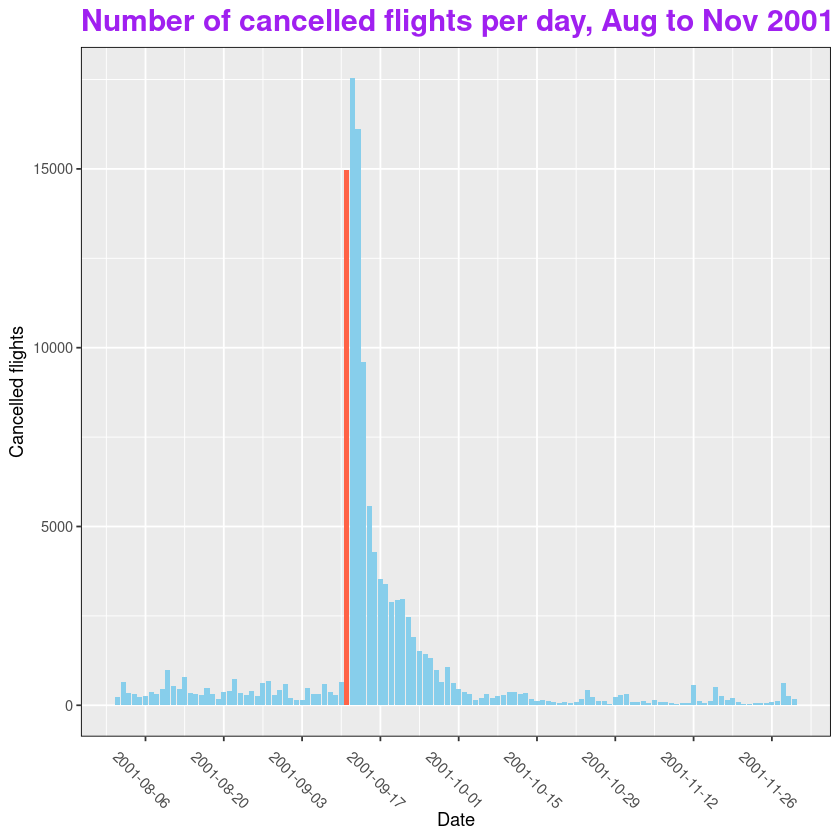

In [7]:
# Plot of DUPA_2
ggplot(flight_counts, 
       aes(x=Date, y=CancelledFlightsNumber, fill=flight_counts$Date==wtc_attack_date)) +
    geom_bar(stat="identity", show.legend=FALSE) +
    labs(title="Number of cancelled flights per day, Aug to Nov 2001" ,x="Date", y="Cancelled flights") +
    theme(
        plot.title=element_text(color="purple", face="bold", size=18), 
        axis.text.x=element_text(angle=-45),
        panel.border=element_rect(color="black", fill=NA)) +
    scale_fill_manual(values=c("skyblue", "tomato1")) +
    scale_x_date(date_breaks="2 week")


### Findings
1. On the plot we can see the huge number of cancelled flights in the days after WTC attack.
2. From September 17th for about a week there is a constant (over 2500) number of cancelled flights caused probably by the weather. Decrease in number of flights (plot 1, finding 1) caused decrease in number of cancelled flights, because when there is no flight, the flight cannot be cancelled.

#### Problem
In the next section (2-the_wtc_attack) we will explore whether the WTC attack had a local or nationwide impact.